<a href="https://colab.research.google.com/github/densivanov/data_analytics_projects/blob/main/uber_analysis/ML_building_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Getting data

In [2]:
df = pd.read_parquet("/content/new_df_.parquet")

In [3]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Pull_Zone
0,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,141,Cash,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,Midtown Center
1,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,237,Credit card,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,Central Park
2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,238,Credit card,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,Clinton East
3,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,7,Credit card,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,LaGuardia Airport
4,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,79,Credit card,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,Gramercy


# Data preparing

**Now I will delete the unwanted columns for the model**

In [4]:
df.drop(['payment_type','passenger_count','tpep_pickup_datetime','tpep_dropoff_datetime','DOLocationID','congestion_surcharge','airport_fee','Pull_Zone'], axis = 1, inplace = True)

In [5]:
df.head()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0.97,9.3,1.00,0.5,0.00,0.0,1.0,14.30
1,1.10,7.9,1.00,0.5,4.00,0.0,1.0,16.90
2,2.51,14.9,1.00,0.5,15.00,0.0,1.0,34.90
3,1.90,12.1,7.25,0.5,0.00,0.0,1.0,20.85
4,1.43,11.4,1.00,0.5,3.28,0.0,1.0,19.68


<Axes: >

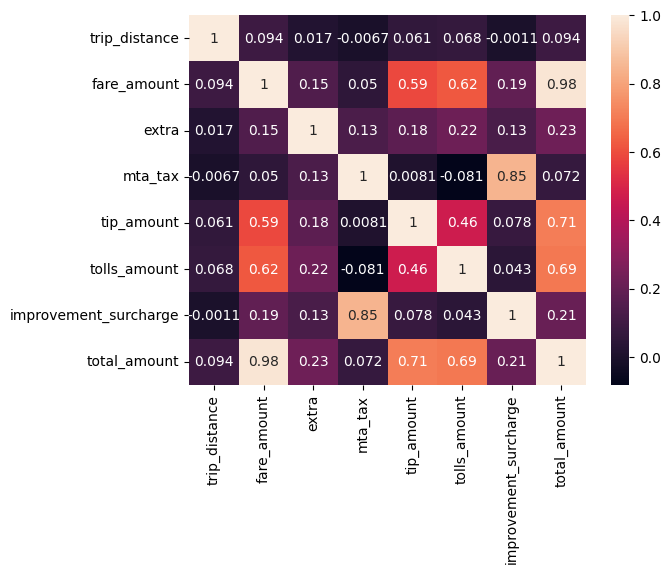

In [6]:
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='tip_amount', ylabel='total_amount'>

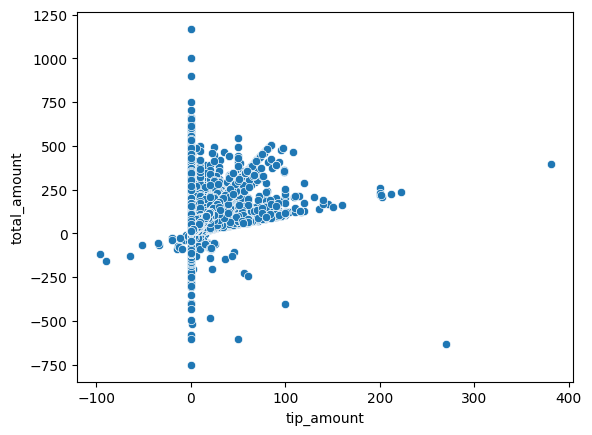

In [7]:
sns.scatterplot(data = df, x = 'tip_amount', y = 'total_amount')

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trip_distance,2995023.0,3.436199,42.091351,0.00,1.06,1.78,3.30,62359.52
fare_amount,2995023.0,18.308272,17.893249,-900.00,8.60,12.80,19.80,1160.10
extra,2995023.0,1.569120,1.795131,-7.50,0.00,1.00,2.50,12.50
mta_tax,2995023.0,0.488026,0.104639,-0.50,0.50,0.50,0.50,53.16
tip_amount,2995023.0,3.359193,3.840552,-96.22,1.00,2.72,4.14,380.80
tolls_amount,2995023.0,0.520226,2.021865,-65.00,0.00,0.00,0.00,196.99
improvement_surcharge,2995023.0,0.981724,0.185387,-1.00,1.00,1.00,1.00,1.00
total_amount,2995023.0,26.969763,22.269083,-751.00,15.40,20.02,28.56,1169.40


In [9]:
df.head()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0.97,9.3,1.00,0.5,0.00,0.0,1.0,14.30
1,1.10,7.9,1.00,0.5,4.00,0.0,1.0,16.90
2,2.51,14.9,1.00,0.5,15.00,0.0,1.0,34.90
3,1.90,12.1,7.25,0.5,0.00,0.0,1.0,20.85
4,1.43,11.4,1.00,0.5,3.28,0.0,1.0,19.68


In [10]:
df.drop(['tolls_amount','tip_amount'], axis = 1, inplace = True)

<Axes: xlabel='fare_amount', ylabel='total_amount'>

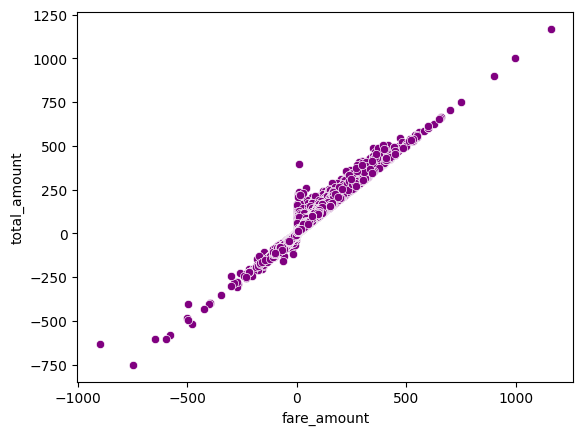

In [11]:
sns.scatterplot(data = df, x = 'fare_amount', y = 'total_amount', color = 'purple')

**Let's build an easy ML model that will describe the final cost. As we can see, the graph is a linear relationship, so we will build a linear regression model.**

In [12]:
df.drop(['trip_distance','extra','mta_tax','improvement_surcharge'], axis = 1, inplace = True)

# Linear regression

#### Importing ML libraries

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [14]:
df.head()

,fare_amount,total_amount
0,9.3,14.30
1,7.9,16.90
2,14.9,34.90
3,12.1,20.85
4,11.4,19.68


In [15]:
X = df[['fare_amount']].copy()
y = df[['total_amount']].copy()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [48]:
scaler = StandardScaler().fit(X_train)

In [49]:
X_train_scaled = scaler.transform(X_train)

In [50]:
X_test_scaled = scaler.transform(X_test)

In [51]:
lnr = LinearRegression()

In [52]:
lnr.fit(X_train_scaled,y_train)

LinearRegression()

In [53]:
lnr.score(X_test_scaled,y_test)

0.9608426828957343

#### Model Evaluation

In [54]:
y_pred = lnr.predict(X_test_scaled)

In [55]:
mean_absolute_error(y_test,y_pred)

2.540502258909281

In [56]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.407764070204776

# Ridge regression

In [62]:
clf = Ridge()

In [63]:
params = {"alpha": np.arange(1,10,2)}

In [67]:
clf_grid = GridSearchCV(clf,params)

In [68]:
clf_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': array([1, 3, 5, 7, 9])})

In [75]:
clf_grid.best_score_

0.96120110613075

In [74]:
ridge = clf_grid.best_estimator_

In [76]:
ridge.score(X_test_scaled,y_test)

0.9608426853425099

#### Model evaluation

In [77]:
y_pred = ridge.predict(X_test_scaled)

In [78]:
mean_absolute_error(y_test,y_pred)

2.540502281717513

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.4077639324934745

We see that the two models have approximately the same score in the end, let's choose a simple linear regression model

# Model saving


In [86]:
import joblib
# saving the model
joblib.dump(lnr, 'linear_regression_model.pkl') 


['linear_regression_model.pkl']